In [1]:
import numpy as np
import cvxpy as cp
import tqdm as tqdm
import matplotlib.pyplot as plt


In [2]:
# # consider fully connected, W = 1/n*11^T, delta_w = 0

# u_f = 0
# L_f = 10

# u_phi = 1
# L_phi = 1

# lambda_2 = 0


# # M_f = np.zeros((7,7))
# # M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# # M_f[4,5]= 1/2
# # M_f[5,4]= 1/2
# # M_f[5,5]= -(1)/(u_f+L_f)


# # M_phi = np.zeros((7,7))
# # M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# # M_phi[4,1]= 1/2
# # M_phi[1,4]= 1/2
# # M_phi[1,1]= -(1)/(u_phi+L_phi)


# # M_lambda = np.zeros((7,7))
# # M_lambda[3,3]= -1
# # M_lambda[1,1]= lambda_2
# # # eta = 0.2
# M_f = np.zeros((5,5))
# M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
# M_f[2,3]= 1/2
# M_f[3,2]= 1/2
# M_f[3,3]= -(1)/(u_f+L_f)


# M_phi = np.zeros((5,5))
# M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[2,0]= 1/2
# M_phi[0,2]= 1/2
# M_phi[0,0]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((5,5))
# M_lambda[4,4]= -1
# M_lambda[0,0]= lambda_2
# # print(M_0)
# # print(M_f)
# # print(M_phi)
# # print(M_lambda)
# M_convex = np.zeros((5,5))
# M_convex[2,3] = M_convex[3,2] = 0.5


# A_1 = np.zeros((2,2))
# A_1[1,0] = A_1[1,1] = 1
# A_1_eta_part = np.zeros((2,2))
# A_1_eta_part[0,1] = -1
# A_2 = np.zeros((2,2))
# A_2[0,0] = A_2[1,1] = 1
# A_2_eta_part = np.zeros((2,2))
# A_1_eta_part[0,1] = -1

# B_1 = np.zeros((2,3))
# B_1[0,2] = 1
# B_1[1,2] = -1
# B_1_eta_part = np.zeros((2,3))
# B_1_eta_part[0,1] = -1
# B_2 = np.zeros((2,3))
# B_2[0,2] = 1
# B_2[1,2] = -1
# B_2_eta_part = np.zeros((2,3))
# B_2_eta_part[0,1] = -1


# R_2 = np.zeros((5,3))
# R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

# sigma_f = cp.Variable()
# sigma_phi = cp.Variable()
# sigma_lambda = cp.Variable()
# epsilon = cp.Variable()
# # rho = cp.Variable()
# rho = 0.999
# # eta = cp.Variable()
# eta = 0.1
# P = cp.Variable((2, 2))
# # P = np.eye(2)
# MAT_temp_1 = cp.Variable((5, 5))
# MAT_temp_2 = cp.Variable((5, 5))


# # constraints += [rho >= 0]
# # constraints += [eta >= 0]
# # constraints += [rho <= 1]
# constraints = [sigma_f >= 0]
# constraints += [sigma_phi >= 0]
# constraints += [sigma_lambda >= 0]
# # constraints += [epsilon == 0]
# constraints += [P >> 0]
# # questionable, P has to be PD
# constraints += [P[0,0] == 1]
# # otherwise it's homogeneous and has multiple optimal solutions
# # constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda - epsilon*M_convex) >> 0]
# constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda ) >> 0]
# constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
# constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
# constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
# constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

# constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
# # constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- epsilon*M_convex)@R_2) >> 0]
# constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
# constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
# constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
# constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# # (A_1 + eta*A_1_eta_part)
# # (A_2 + eta*A_2_eta_part)
# # (B_1 + eta*B_1_eta_part)
# # (B_2 + eta*B_2_eta_part)
# prob=cp.Problem(cp.Minimize(rho), constraints)
# # prob=cp.Problem(cp.Maximize(0), constraints)
# prob.solve()


# print("The optimal value is", prob.value)
# print("A solution is")
# print(sigma_f.value, sigma_phi.value, epsilon.value)
# print("P matrix is:", P.value)
# # print(prob.value == 0)

In [3]:
# consider fully connected, W = 1/n*11^T, delta_w = 0

u_f = 0
L_f = 1

u_phi = 1
L_phi = 1

lambda_2 = 0


# M_f = np.zeros((7,7))
# M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# M_f[4,5]= 1/2
# M_f[5,4]= 1/2
# M_f[5,5]= -(1)/(u_f+L_f)


# M_phi = np.zeros((7,7))
# M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[4,1]= 1/2
# M_phi[1,4]= 1/2
# M_phi[1,1]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((7,7))
# M_lambda[3,3]= -1
# M_lambda[1,1]= lambda_2
# # eta = 0.2
M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)


M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)


M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2
# print(M_0)
# print(M_f)
# print(M_phi)
# print(M_lambda)
M_convex = np.zeros((5,5))
M_convex[2,3] = M_convex[3,2] = 0.5


A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1


R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
sigma_lambda = cp.Variable()
epsilon = cp.Variable()

# rho = cp.Variable()
rho = 1
# eta = cp.Variable()
eta = 0.01
P = cp.Variable((2, 2))
# P = np.eye(2)
MAT_temp_1 = cp.Variable((5, 5))
MAT_temp_2 = cp.Variable((5, 5))


# constraints += [rho >= 0]
# constraints += [eta >= 0]
# constraints += [rho <= 1]
constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [sigma_lambda >= 0]
constraints += [epsilon >= 0]

constraints += [P >> 0]
# questionable, P has to be PD
constraints += [P[0,0] == 1]
# otherwise it's homogeneous and has multiple optimal solutions
constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- epsilon*M_convex) >> 0]
constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- epsilon*M_convex)@R_2) >> 0]
constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# (A_1 + eta*A_1_eta_part)
# (A_2 + eta*A_2_eta_part)
# (B_1 + eta*B_1_eta_part)
# (B_2 + eta*B_2_eta_part)
# prob=cp.Problem(cp.Minimize(1), constraints)
prob=cp.Problem(cp.Maximize(epsilon), constraints)
prob.solve(solver="SCS")


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value, )
print("P matrix is:", P.value)
print(prob.value == 0)

The optimal value is 0.01980091853875673
A solution is
0.00019911649401016206 1222.101727722635
P matrix is: [[1.0000002  0.00889163]
 [0.00889164 0.00789455]]
False


In [37]:
# # consider fully connected, W = 1/n*11^T, delta_w = 0

# u_f = 0
# L_f = 1

# u_phi = 1
# L_phi = 1

# lambda_2 = 0


# # M_f = np.zeros((7,7))
# # M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# # M_f[4,5]= 1/2
# # M_f[5,4]= 1/2
# # M_f[5,5]= -(1)/(u_f+L_f)


# # M_phi = np.zeros((7,7))
# # M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# # M_phi[4,1]= 1/2
# # M_phi[1,4]= 1/2
# # M_phi[1,1]= -(1)/(u_phi+L_phi)


# # M_lambda = np.zeros((7,7))
# # M_lambda[3,3]= -1
# # M_lambda[1,1]= lambda_2
# # # eta = 0.2
# M_f = np.zeros((5,5))
# M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
# M_f[2,3]= 1/2
# M_f[3,2]= 1/2
# M_f[3,3]= -(1)/(u_f+L_f)


# M_phi = np.zeros((5,5))
# M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[2,0]= 1/2
# M_phi[0,2]= 1/2
# M_phi[0,0]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((5,5))
# M_lambda[4,4]= -1
# M_lambda[0,0]= lambda_2
# # print(M_0)
# # print(M_f)
# # print(M_phi)
# # print(M_lambda)
# M_convex = np.zeros((5,5))
# M_convex[2,3] = M_convex[3,2] = 0.5

# M_1_convex = np.zeros((5,5))
# # M_1_convex[2,2] = L_f
# # M_1_convex[2,3] = M_1_convex[3,2] = -0.5

# M_2_convex = np.zeros((5,5))
# # M_2_convex[2,2] = 0.5*L_f
# # M_2_convex[2,3] = M_2_convex[3,2] = 0.5

# A_1 = np.zeros((2,2))
# A_1[1,0] = A_1[1,1] = 1
# A_1_eta_part = np.zeros((2,2))
# A_1_eta_part[0,1] = -1
# A_2 = np.zeros((2,2))
# A_2[0,0] = A_2[1,1] = 1
# A_2_eta_part = np.zeros((2,2))
# A_1_eta_part[0,1] = -1

# B_1 = np.zeros((2,3))
# B_1[0,2] = 1
# B_1[1,2] = -1
# B_1_eta_part = np.zeros((2,3))
# B_1_eta_part[0,1] = -1
# B_2 = np.zeros((2,3))
# B_2[0,2] = 1
# B_2[1,2] = -1
# B_2_eta_part = np.zeros((2,3))
# B_2_eta_part[0,1] = -1


# R_2 = np.zeros((5,3))
# R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

# sigma_f = cp.Variable()
# sigma_phi = cp.Variable()
# sigma_lambda = cp.Variable()
# epsilon = cp.Variable()

# # rho = cp.Variable()
# rho = 1
# # eta = cp.Variable()
# eta = 0.01
# P = cp.Variable((2, 2))
# # P = np.eye(2)
# MAT_temp_1 = cp.Variable((5, 5))
# MAT_temp_2 = cp.Variable((5, 5))


# # constraints += [rho >= 0]
# # constraints += [eta >= 0]
# # constraints += [rho <= 1]
# constraints = [sigma_f >= 0]
# constraints += [sigma_phi >= 0]
# constraints += [sigma_lambda >= 0]
# constraints += [epsilon >= 0]

# constraints += [P >> 0]
# # questionable, P has to be PD
# constraints += [P[0,0] == 1]
# # otherwise it's homogeneous and has multiple optimal solutions
# constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
# constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
# constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
# constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
# constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

# constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
# constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
# constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
# constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
# constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# # (A_1 + eta*A_1_eta_part)
# # (A_2 + eta*A_2_eta_part)
# # (B_1 + eta*B_1_eta_part)
# # (B_2 + eta*B_2_eta_part)
# prob=cp.Problem(cp.Minimize(1), constraints)
# # prob=cp.Problem(cp.Maximize(epsilon), constraints)
# prob.solve(solver="SCS")


# print("The optimal value is", prob.value)
# print("A solution is")
# print(sigma_f.value, sigma_phi.value, )
# print("P matrix is:", P.value)
# print(prob.value == 0)

In [53]:
# consider fully connected, W = 1/n*11^T, delta_w = 0

u_f = 0
L_f = 1

u_phi = 1
L_phi = 1

lambda_2 = 0


# M_f = np.zeros((7,7))
# M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# M_f[4,5]= 1/2
# M_f[5,4]= 1/2
# M_f[5,5]= -(1)/(u_f+L_f)


# M_phi = np.zeros((7,7))
# M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[4,1]= 1/2
# M_phi[1,4]= 1/2
# M_phi[1,1]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((7,7))
# M_lambda[3,3]= -1
# M_lambda[1,1]= lambda_2
# # eta = 0.2
M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)


M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)


M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2
# print(M_0)
# print(M_f)
# print(M_phi)
# print(M_lambda)
M_convex = np.zeros((5,5))
M_convex[2,3] = M_convex[3,2] = 0.5

M_1_convex = np.zeros((5,5))
M_1_convex[2,2] = -0.5*L_f
# M_1_convex[2,3] = M_1_convex[3,2] = -0.5

M_2_convex = np.zeros((5,5))
# M_2_convex[2,2] = 0.5*L_f
M_2_convex[2,3] = M_2_convex[3,2] = 0.5

A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1


R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
sigma_lambda = cp.Variable()
epsilon = cp.Variable()

# rho = cp.Variable()
rho = 1
# eta = cp.Variable()
eta = 0.01
P = cp.Variable((2, 2))
# P = np.eye(2)
MAT_temp_1 = cp.Variable((5, 5))
MAT_temp_2 = cp.Variable((5, 5))


# constraints += [rho >= 0]
# constraints += [eta >= 0]
# constraints += [rho <= 1]
constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [sigma_lambda >= 0]
constraints += [epsilon >= 0]

constraints += [P >> 0]
# questionable, P has to be PD
constraints += [P[0,0] == 1]
# otherwise it's homogeneous and has multiple optimal solutions
constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- epsilon*M_1_convex) >> 0]
constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - P)]
constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- epsilon*M_2_convex)@R_2) >> 0]
constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - P)]
constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# (A_1 + eta*A_1_eta_part)
# (A_2 + eta*A_2_eta_part)
# (B_1 + eta*B_1_eta_part)
# (B_2 + eta*B_2_eta_part)
# prob=cp.Problem(cp.Minimize(1), constraints)
prob=cp.Problem(cp.Maximize(epsilon), constraints)
prob.solve(solver="SCS")


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value, epsilon.value )
print("P matrix is:", P.value)
print(prob.value == 0)

The optimal value is 0.019903196112023222
A solution is
0.00013875332238772172 3.8096385546409826 0.019903196112023226
P matrix is: [[0.99999445 0.00971071]
 [0.00971071 0.00994388]]
False


In [3]:
u_f = 5
L_f = 10

u_phi = 1
L_phi = 1

lambda_2 = 0.2

M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)

M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)

M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2

M_convex = np.zeros((5,5))
M_convex[2,3] = M_convex[3,2] = 0.5

A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1

R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

# resolution = 100
# eta_selection = np.linspace(0,0.2,resolution,endpoint=False)
# rho_selection = np.linspace(0.8,1,resolution,endpoint=False)
# viable = np.zeros((resolution,resolution))
# for i, eta in tqdm.tqdm(enumerate(eta_selection)):
#     for j, rho in enumerate(rho_selection):
eta = 0.1
rho = 1
constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [sigma_lambda >= 0]
constraints += [P >> 0]
# questionable, P has to be PD
constraints += [P[0,0] == 1]
# otherwise it's homogeneous and has multiple optimal solutions
constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# (A_1 + eta*A_1_eta_part)
# (A_2 + eta*A_2_eta_part)
# (B_1 + eta*B_1_eta_part)
# (B_2 + eta*B_2_eta_part)
prob=cp.Problem(cp.Minimize(rho), constraints)
#         prob.setSolverParam("numThreads", 4)
# prob=cp.Problem(cp.Maximize(rho), constraints)
try:
    prob.solve()
#             prob.solve(solver=MOSEK, mosek_params={mosek.iparam.num_threads: 8})
except:
    continue
if prob.status not in ["infeasible", "unbounded"]:
#             print("Problem is solvable for eta, rho:", eta, rho)
#             viable[i,j] = 1
best_eta = eta_selection[np.argmax(np.sum(viable, axis=1))]
# print(best_eta)
best_rho = rho_selection[np.argmax(viable[np.argmax(np.sum(viable, axis=1))])]
print(best_rho)

100it [06:16,  3.76s/it]

0.944


0.056
0.944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


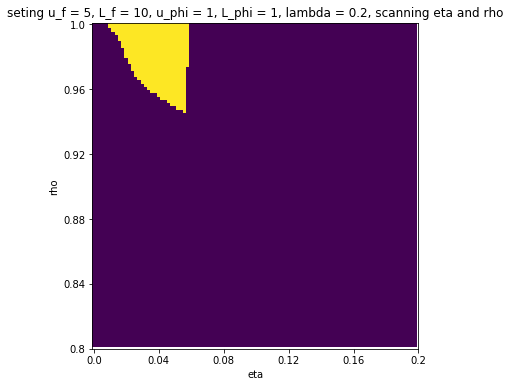

In [4]:
# viable
fig = plt.figure(figsize=(8, 6))

plt.imshow(np.flip(np.transpose(viable), axis=0))
plt.ylabel("rho")
plt.xlabel("eta")
tick_num = 6

plt.yticks(np.linspace(0,resolution, tick_num,endpoint=True), np.around(np.linspace(1,0.8, tick_num,endpoint=True),2))
plt.xticks(np.linspace(0,resolution, tick_num,endpoint=True), np.around(np.linspace(0,0.2, tick_num,endpoint=True),2))
plt.title("seting u_f = 5, L_f = 10, u_phi = 1, L_phi = 1, lambda = 0.2, scanning eta and rho")
# plt.savefig("distributed_5")
# plt.show()

best_eta = eta_selection[np.argmax(np.sum(viable, axis=1))]
print(best_eta)
best_rho = rho_selection[np.argmax(viable[np.argmax(np.sum(viable, axis=1))])]
print(best_rho)
print(viable[0])
# plt.plot(best_eta)
# plt.show()

In [40]:
u_g = u_f 
alpha = u_g*(1 + 0)/(4*L_f*L_f)
# lambda_2 = 0.2

EXTRA_theta  = cp.Variable()
resolution = 10000
theta_selection = np.linspace(1,10,resolution,endpoint=False)
EXTRA_rate = np.zeros(resolution)
IQC_rate = np.ones(resolution) * best_rho


for i, EXTRA_theta in enumerate(theta_selection):
    delta_1 = alpha*(u_g )*(1 - lambda_2)/(EXTRA_theta * alpha * L_f * L_f + (1 - lambda_2 ))

    delta_2 = (EXTRA_theta - 1)*u_g* (1 - lambda_2 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))
    
    best_delta = np.minimum(delta_1,delta_2)
    
    EXTRA_rate[i] = 1/(1 + best_delta)


plt.plot(theta_selection, EXTRA_rate, label="EXTRA")
plt.plot(theta_selection, IQC_rate, label="IQC")
plt.legend(loc='lower right')
plt.xlabel("theta")
plt.title("Comparison lambda_2 = 0.2")

plt.ylim(0.8,1)
plt.savefig("Comparison with graph2")

100it [04:21,  2.61s/it]
0it [00:00, ?it/s]

0.67


100it [04:19,  2.59s/it]
0it [00:00, ?it/s]

0.685


100it [04:17,  2.58s/it]
0it [00:00, ?it/s]

0.7


100it [04:16,  2.57s/it]
0it [00:00, ?it/s]

0.71


100it [04:17,  2.58s/it]
0it [00:00, ?it/s]

0.73


100it [04:18,  2.58s/it]
0it [00:00, ?it/s]

0.74


100it [04:18,  2.59s/it]
0it [00:00, ?it/s]

0.76


100it [04:17,  2.57s/it]
0it [00:00, ?it/s]

0.775


100it [04:17,  2.58s/it]
0it [00:00, ?it/s]

0.7949999999999999


100it [04:17,  2.58s/it]

0.825


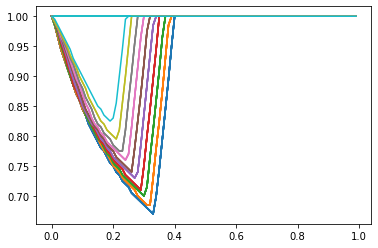

In [39]:
IQC_best_list = np.zeros(10)
resolution = 100

IQC_rho_plot = np.zeros((10, resolution))
for lambeda_choice in range(10):
    u_f = 1
    L_f = 3

    u_phi = 1
    L_phi = 1

    lambda_2 = (lambeda_choice/20)**2

    M_f = np.zeros((5,5))
    M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
    M_f[2,3]= 1/2
    M_f[3,2]= 1/2
    M_f[3,3]= -(1)/(u_f+L_f)

    M_phi = np.zeros((5,5))
    M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
    M_phi[2,0]= 1/2
    M_phi[0,2]= 1/2
    M_phi[0,0]= -(1)/(u_phi+L_phi)

    M_lambda = np.zeros((5,5))
    M_lambda[4,4]= -1
    M_lambda[0,0]= lambda_2

    A_1 = np.zeros((2,2))
    A_1[1,0] = A_1[1,1] = 1
    A_1_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1
    A_2 = np.zeros((2,2))
    A_2[0,0] = A_2[1,1] = 1
    A_2_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1

    B_1 = np.zeros((2,3))
    B_1[0,2] = 1
    B_1[1,2] = -1
    B_1_eta_part = np.zeros((2,3))
    B_1_eta_part[0,1] = -1
    B_2 = np.zeros((2,3))
    B_2[0,2] = 1
    B_2[1,2] = -1
    B_2_eta_part = np.zeros((2,3))
    B_2_eta_part[0,1] = -1

    R_2 = np.zeros((5,3))
    R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

    eta_selection = np.linspace(0,1,resolution,endpoint=False)
    rho_selection = np.linspace(0.5,1,resolution,endpoint=False)
    viable = np.zeros((resolution,resolution))
    for i, eta in tqdm.tqdm(enumerate(eta_selection)):
        for j, rho in enumerate(rho_selection):
            constraints = [sigma_f >= 0]
            constraints += [sigma_phi >= 0]
            constraints += [sigma_lambda >= 0]
            constraints += [P >> 0]
            # questionable, P has to be PD
            constraints += [P[0,0] == 1]
            # otherwise it's homogeneous and has multiple optimal solutions
            constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
            constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
            constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
            constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
            constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

            constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
            constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
            constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
            constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
            constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

            # (A_1 + eta*A_1_eta_part)
            # (A_2 + eta*A_2_eta_part)
            # (B_1 + eta*B_1_eta_part)
            # (B_2 + eta*B_2_eta_part)
            prob=cp.Problem(cp.Minimize(rho), constraints)
    #         prob.setSolverParam("numThreads", 4)
            # prob=cp.Problem(cp.Maximize(rho), constraints)
            try:
                prob.solve()
    #             prob.solve(solver=MOSEK, mosek_params={mosek.iparam.num_threads: 8})
            except:
                continue
            if prob.status not in ["infeasible", "unbounded"]:
    #             print("Problem is solvable for eta, rho:", eta, rho)
                viable[i,j] = 1
    best_eta = eta_selection[np.argmax(np.sum(viable, axis=1))]
    # print(best_eta)
    best_rho = rho_selection[np.argmax(viable[np.argmax(np.sum(viable, axis=1))])]
    print(best_rho)
    IQC_best_list[lambeda_choice] = best_rho
    for step in range(resolution):
        possible = viable[step,:]
        IQC_rho_plot[lambeda_choice, step] = np.sum(viable[step,:])
    if best_eta == 0:
        print("no solution")
        IQC_best_list[lambeda_choice] = 1
    plt.plot(eta_selection, 1-(IQC_rho_plot.T)/200)
#     plt.imshow(np.flip(np.transpose(viable), axis=0))
#     plt.show()

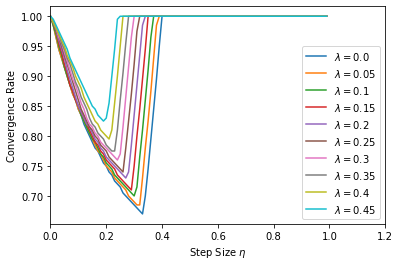

In [40]:
# plt.plot(eta_selection, 1-(IQC_rho_plot.T)/200)
for i in range(10):
    plt.plot(eta_selection, 1-(IQC_rho_plot[i])/(2*resolution), label="$\lambda=$"+str(i/20))

plt.ylabel("Convergence Rate")
plt.xlabel("Step Size $\eta$")
plt.xlim(0,1.2)

plt.legend()
# plt.savefig('lambda_dif.pdf')  

In [41]:
IQC_rho_plot = 1-(IQC_rho_plot)/(2*resolution)
np.save("IQC_rho_plot_f4rho1", IQC_rho_plot)

In [37]:
EXTRA_best_list = np.zeros(10)
for lambeda_choice in range(10):
    u_f = 1
    L_f = 4

    u_phi = 1
    L_phi = 1

    lambda_1 = (lambeda_choice/20)
    lambda_min = 0
    u_g = u_f 
    alpha = u_g*(1 + lambda_min)/(4*L_f*L_f)
    # lambda_2 = 0.2

    EXTRA_theta  = cp.Variable()
    resolution = 10000
    theta_selection = np.linspace(1,10,resolution,endpoint=False)
    EXTRA_rate = np.zeros(resolution)
#     IQC_rate = np.ones(resolution) * best_rho


    for i, EXTRA_theta in enumerate(theta_selection):
        delta_1 = alpha*(u_g )*(1 - lambda_1)/(EXTRA_theta * alpha* alpha * L_f * L_f + (1 - lambda_1 ))
#         delta_1 = alpha*(u_g )

        delta_2 = (EXTRA_theta - 1)*(u_g*(1 + lambda_min)/2 - alpha* L_f * L_f)* (1 - lambda_1 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))

        best_delta = np.minimum(delta_1,delta_2)

        EXTRA_rate[i] = 1/(1 + best_delta)
#     u_g = u_f 
#     alpha = u_g*(1 + 0)/(4*L_f*L_f)
#     lambda_2 = (lambeda_choice/20)

#     EXTRA_theta  = cp.Variable()
#     resolution = 10000
#     theta_selection = np.linspace(1,10,resolution,endpoint=False)
#     EXTRA_rate = np.zeros(resolution)
#     IQC_rate = np.ones(resolution) * best_rho


#     for i, EXTRA_theta in enumerate(theta_selection):
#         delta_1 = alpha*(u_g )*(1 - lambda_2)/(EXTRA_theta * alpha * L_f * L_f + (1 - lambda_2 ))

#         delta_2 = (EXTRA_theta - 1)*u_g* (1 - lambda_2 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))

#         best_delta = np.minimum(delta_1,delta_2)

#         EXTRA_rate[i] = 1/(1 + best_delta)
    EXTRA_best_list[lambeda_choice] = np.min(EXTRA_rate)

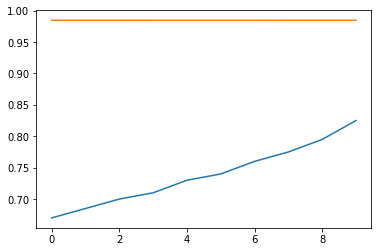

In [42]:
plt.plot(IQC_best_list)
plt.plot(EXTRA_best_list)
np.save("IQC_best_list_1_3", IQC_best_list)
# np.save("EXTRA_best_list_1_10", EXTRA_best_list)


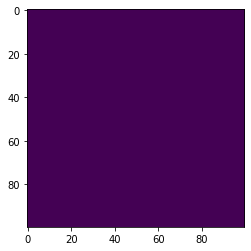

In [48]:
plt.imshow(viable)